['/data/lvm/sci/agcam/east/20230220/lvm.sci.agcam.east_00000507.fits', '/data/lvm/sci/agcam/center/20230220/lvm.sci.agcam.center_00000517.fits']


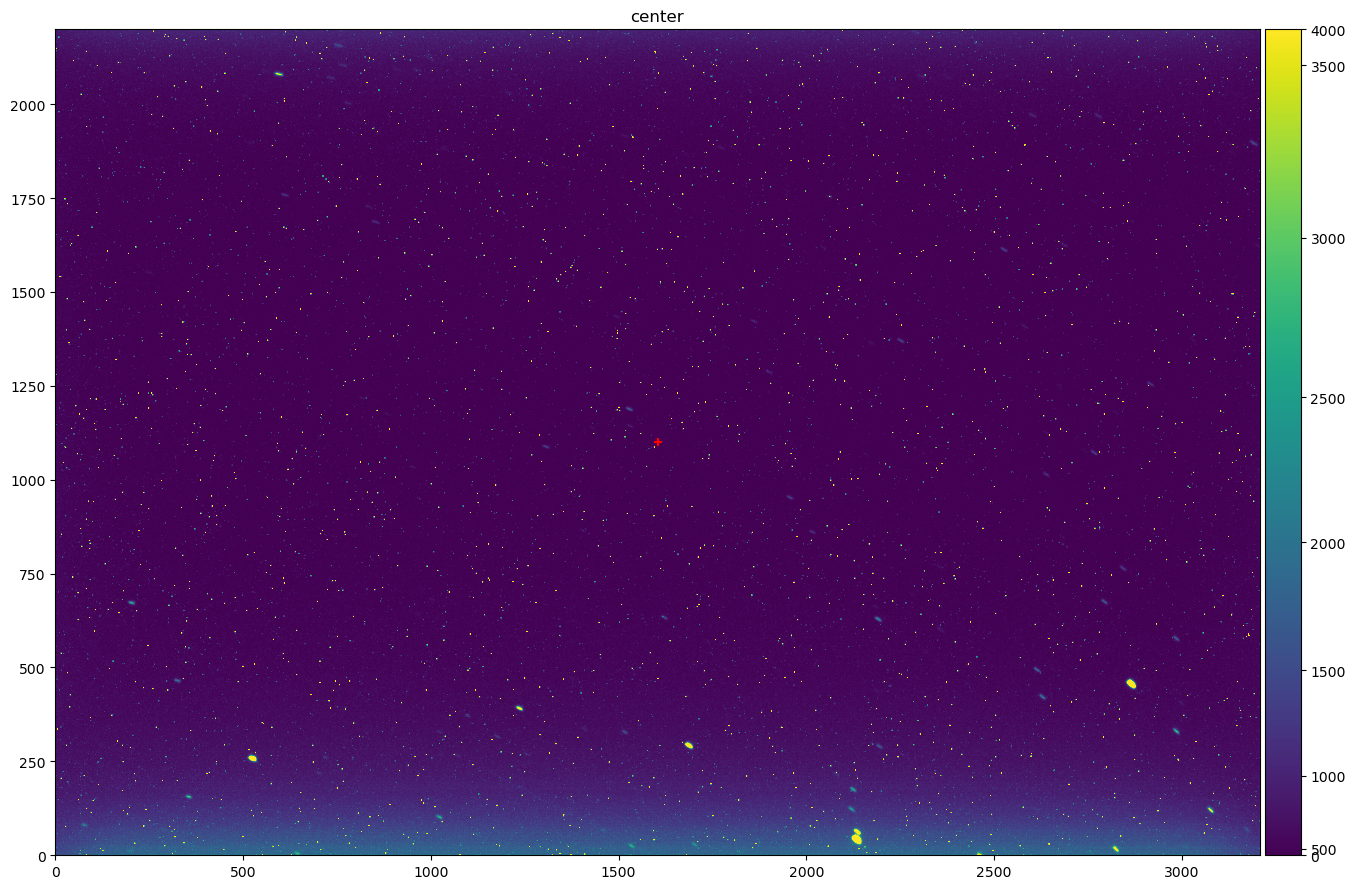

CancelledError: 

In [13]:
%matplotlib inline 
#%matplotlib widget 

import asyncio

from cluplus.proxy import invoke

from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

from IPython.display import clear_output

tel = lvm.from_string("sci")

await tel.start()
await tel.pwi.setConnected(True, statusTick=1.0)
await tel.agc.reconnect()

exptime = 30

while True:
    rc = await tel.agc.expose( exptime)
    filenames = rc.flatten().unpack("*.filename")
    clear_output()
    print(filenames)
    images = [Image.from_file(f) for f in filenames]
    plot_images([images[1]])
    print()

In [9]:
await tel.pwi.gotoRaDecJ2000(6.5, 4.95)


{'ra_j2000_hours': 6.50001576541968, 'dec_j2000_degs': 4.9501780204231}